In [225]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# generation model pour le deploiement 
import pickle 
#cleaning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Importation et exploration des donnees

In [147]:
#lire la base de données
df = pd.read_csv("C:/Users/user/Documents/project data Science/train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [149]:
# afficher la valeur maximal des lignes
pd.set_option('display.max_rows',df.shape[0]+1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [150]:
#afficher 10 lignes (5 premieres et 5 dernnieres)
pd.set_option('display.max_rows',10)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [153]:
# voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [155]:
# voir les valeur manquantes et les sommer et les classer
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [157]:
# valeur annormal
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [159]:
# valeur des category
df.describe(include='O') 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Pretraitement

#Prendre les valeurs catégoriques et les renseigner d'une manière appropriée.
Prendre les valeurs manquantes par la valeur qui se répète le plus.
Pour les valeurs numériques, renseigner chaque valeur manquante par la valeur qui est à côté.

step 1 : diviser les valeur en deux (numerique et categorique)

In [164]:
# Renseigner les valeurs manquantes
cat_data = []
num_data = []

for i, c in enumerate(df.dtypes):
    if c == 'object':  # Assuming categorical data types are 'object'
        cat_data.append(df.iloc[:, i])  # Append the categorical column
    else:
        num_data.append(df.iloc[:, i])  # Append the numerical column
        
cat_data=pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [166]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


# Cleaning

In [169]:
# pour les valeur categorique on va remplacer les valeur manquantes par la valeur qui se repete le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [171]:
cat_data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [173]:
# pour les valeur c on va remplacer les valeur numerique par les valeur manquantes par la valeur qui se repete le plus
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()


C:\Users\user\AppData\Local\Temp\ipykernel_17324\218033515.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill', inplace=True)


False

In [175]:
# creation nv dictionaire
# transformer la colonne target
target_value={'Y':1,'N':0}
target=cat_data ['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [177]:
#remplacer les valeurs categoriques par des valeurs numérique 0,1,2..
le = LabelEncoder()

# Boucle à travers chaque colonne dans cat_data
for i in cat_data:
    # Appliquer LabelEncoder à chaque colonne de cat_data
    cat_data[i] = le.fit_transform(cat_data[i])

# Afficher le DataFrame transformé
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [179]:
# Supprimer loanID 
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [181]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [183]:
#concatener cat_Data et num_Data et specifier la colonne target
#x pour les données independant et y dependant
X=pd.concat([cat_data,num_data],axis=1)
Y=target

In [185]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Analyse Exploratoire

In [197]:
# variable target
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [203]:
# la base de utilise pou EDA
df=pd.concat([cat_data,num_data,target],axis=1)

Le pourcentage des crédits accordés est : 0.3127035830618892
Le pourcentage des crédits non accordés est : 0.6872964169381107


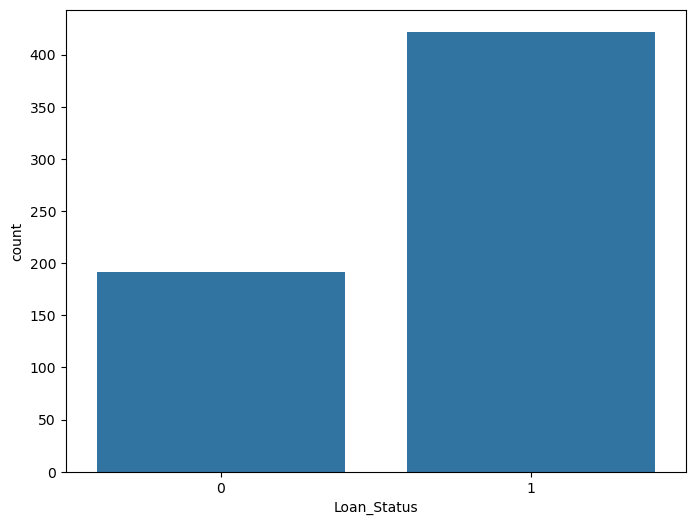

In [205]:
plt.figure(figsize=(8,6))
sns.countplot(x=target)  # Ajoutez "x=" pour préciser la variable cible
yes = target.value_counts()[0] / len(target)
no = target.value_counts()[1] / len(target)
print(f'Le pourcentage des crédits accordés est : {yes}')
print(f'Le pourcentage des crédits non accordés est : {no}')

In [207]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')


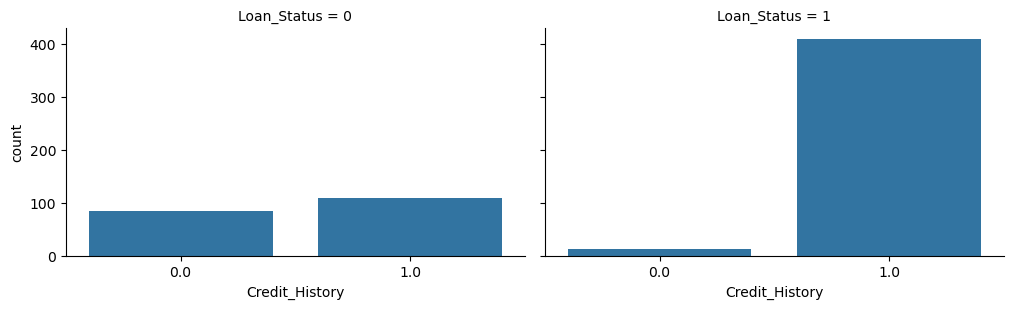

In [209]:
if 'Credit_History' in df.columns and 'Loan_Status' in df.columns:
    grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
    grid.map_dataframe(sns.countplot, x='Credit_History')
    plt.show()
else:
    print("Les colonnes 'Credit_History' ou 'Loan_Status' sont absentes de df.")

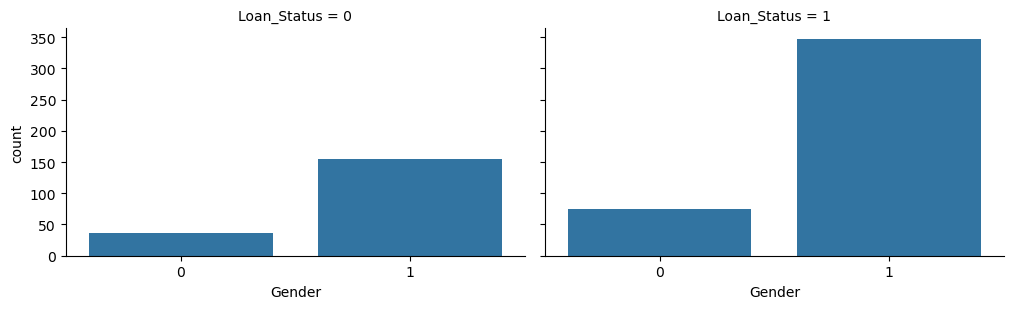

In [211]:
if 'Gender' in df.columns and 'Loan_Status' in df.columns:
    grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
    grid.map_dataframe(sns.countplot, x='Gender')
    plt.show()
else:
    print("Les colonnes 'Gender' ou 'Loan_Status' sont absentes de df.")

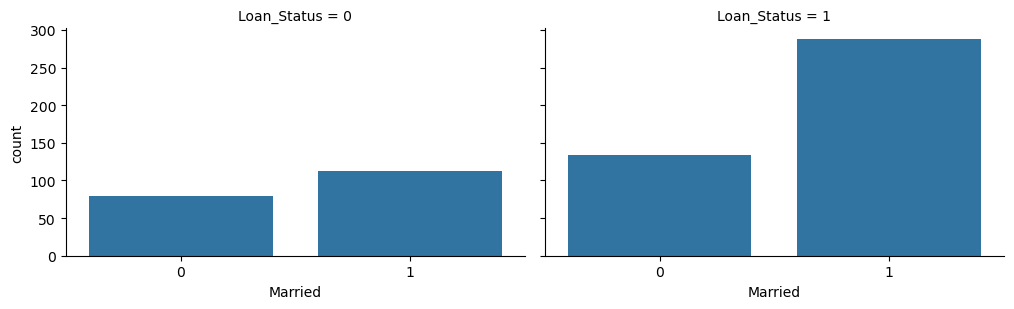

In [213]:
if 'Married' in df.columns and 'Loan_Status' in df.columns:
    grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
    grid.map_dataframe(sns.countplot, x='Married')
    plt.show()
else:
    print("Les colonnes 'Married' ou 'Loan_Status' sont absentes de df.")

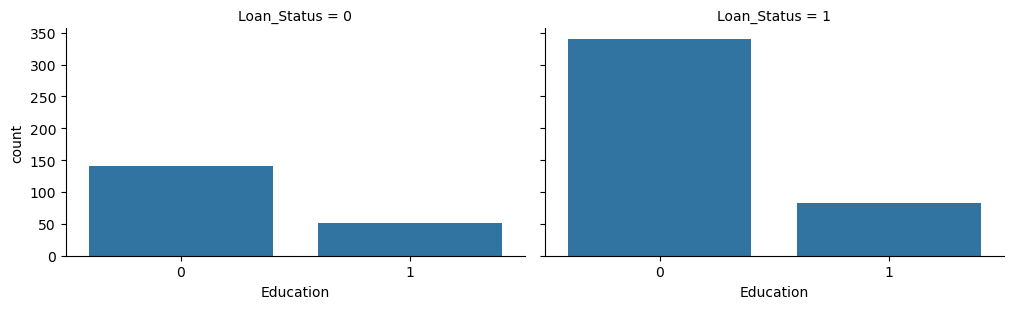

In [215]:
if 'Education' in df.columns and 'Loan_Status' in df.columns:
    grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
    grid.map_dataframe(sns.countplot, x='Education')
    plt.show()
else:
    print("Les colonnes 'Gender' ou 'Loan_Status' sont absentes de df.")

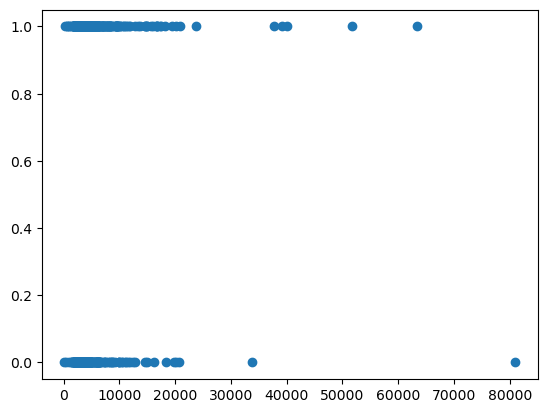

In [217]:
# revenue du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

In [219]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


# Model Creation

Ce code Python utilise la technique de StratifiedShuffleSplit pour diviser une base de données en ensembles d'entraînement et de test. Cette technique garantit que la proportion de chaque classe dans l'ensemble d'entraînement est similaire à celle de l'ensemble de test.

In [229]:
#Diviser la base de données en une base de données test et dentrainement 
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X, Y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('Y_train taille: ', Y_train.shape)
print('Y_test taille: ', Y_test.shape)

X_train taille:  (491, 11)
X_test taille:  (123, 11)
Y_train taille:  (491,)
Y_test taille:  (123,)


In [231]:
# On va appliquer 3 alg logistic regression , KNN , DecisionTree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Modèles que nous allons utiliser
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Fonction pour calculer la précision
def accu(Y_true, Y_pred, retu=False):
    acc = accuracy_score(Y_true, Y_pred)
    if retu:
        return acc
    else:
        print(f'La précision du modèle est : {acc}')

# Fonction pour entraîner et évaluer les modèles
def train_test_eval(models, X_train, Y_train, X_test, Y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, Y_train)
        accu(Y_test, model.predict(X_test))
        print("_" * 30)

# Exécution de la fonction avec les données d'entraînement et de test
train_test_eval(models, X_train, Y_train, X_test, Y_test)

DecisionTreeClassifier :
La précision du modèle est : 0.8455284552845529
______________________________
KNeighborsClassifier :
La précision du modèle est : 0.6504065040650406
______________________________
LogisticRegression :
La précision du modèle est : 0.8536585365853658
______________________________


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [237]:
#creation une nv bd 
X_2=X[['Credit_History', 'Married', 'CoapplicantIncome']]

In [241]:
#Diviser la base de données en une base de données test et dentrainement 
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X_2, Y):
    X_train, X_test = X_2.iloc[train], X_2.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('Y_train taille: ', Y_train.shape)
print('Y_test taille: ', Y_test.shape)

X_train taille:  (491, 3)
X_test taille:  (123, 3)
Y_train taille:  (491,)
Y_test taille:  (123,)


In [239]:
train_test_eval(models, X_train, Y_train, X_test, Y_test)

DecisionTreeClassifier :
La précision du modèle est : 0.8455284552845529
______________________________
KNeighborsClassifier :
La précision du modèle est : 0.6504065040650406
______________________________
LogisticRegression :
La précision du modèle est : 0.8536585365853658
______________________________


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [275]:
# Appliquer la regression logisitique sur notre base de donnée
Classifier=LogisticRegression()
Classifier.fit(X_2,Y)
print(Classifier.get_params())


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [277]:
#Enregistrer le model 
pickle.dump(Classifier,open('model.pkl','wb'))